## Red Wine Quality Prediction

Dataset Description
The dataset used for this project is the Wine Quality Dataset, which is commonly utilized for regression and classification tasks. It contains chemical properties of wine along with their corresponding quality ratings. The dataset includes the following key features:

## Column Summary

1. Fixed acidity: The amount of non-volatile acids in wine.
2. Volatile acidity: The amount of acetic acid in wine, which affects its taste.
3. Citric acid: The amount of citric acid, which adds freshness and flavor to the wine.
4. Residual sugar: The amount of sugar remaining after fermentation.
5. Chlorides: The amount of salt in the wine.
6. Free sulfur dioxide: The free form of SO2 in wine, which prevents microbial growth and oxidation.
7. Total sulfur dioxide: The total amount of SO2, including the free and bound forms.
8. Density: The density of the wine, which can be related to its alcohol content and sugar level.
9. pH: The acidity or basicity of the wine.
10. Sulphates: The amount of sulfate added to prevent spoilage and oxidation.
11. Alcohol: The alcohol content of the wine.



**Target Variable
Quality: The quality rating of the wine on a scale of 0 to 10, where higher values indicate better quality** 

## Table of Content

1. Importing Libraries
2. Loading Data
3. Data Cleaning
4. Performing EDA
5. Coorelation Matrix
6. Train and Evaluate Model
7. Accuracy Comparison

## 1. Importing Libraries

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 2. Loading Data

In [2]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\PEM\pro\wine quality\winequality-red.csv")

In [3]:
# It returns the first 5 rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# it returns the last 5 rows of the dataset
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# no. of rows and column
data.shape

(1599, 12)

In [6]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [7]:
# checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

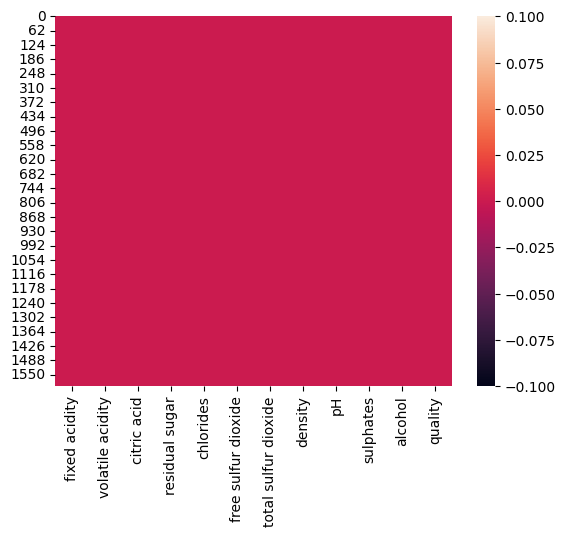

In [8]:
# now checking the null value in visualization form
sns.heatmap(data.isnull())
plt.show()

In [23]:
# check the duplicate value
data.duplicated().sum()

240

In [24]:
# handle the duplicate value
data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## 4. Performing EDA

In [10]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# Statistical information about the dataset
data.describe()   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
# Based on quality parameter now im adding a new column good quality if >= 6 its a good qulity wine and less than that it is 0 bad quality
data['goodquality'] = [1 if x>= 6 else 0 for x in data['quality']]

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


**Renaming the column name if they are lengthy**

In [14]:
# here the chemical compound formula of sulfur dioxide is SO2 so replaced with inplace to make it permanent
data.rename(columns ={'free sulfur dioxide':'free SO2','total sulfur dioxide':'total SO2'},inplace = True)
data          

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free SO2,total SO2,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


**Data visualization**

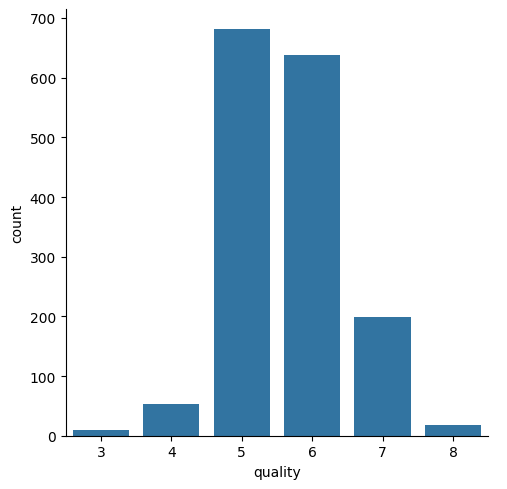

In [15]:
# if the quality values is less then 6 it is bad quality one here we have 6 quality values
sns.catplot(x = 'quality', data = data,kind = 'count')  
plt.show()


Text(0.5, 1.0, 'Volatile acidity vs Quality ')

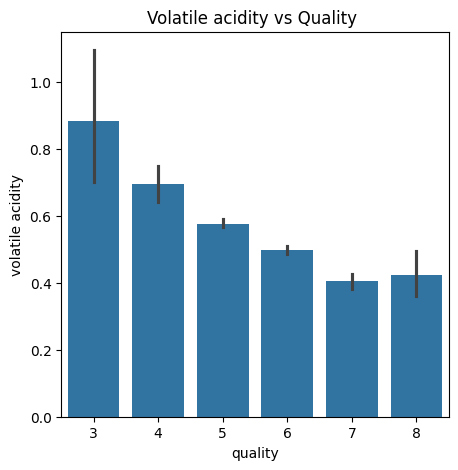

In [16]:
plot = plt.figure(figsize =(5,5)) 

# volatile acidity and wine is inversely proportional if Volatile acidity is high quality is low 
sns.barplot(x = 'quality',y = 'volatile acidity', data = data) 

plt.title('Volatile acidity vs Quality ')

Text(0.5, 1.0, 'Citric acid vs Quality ')

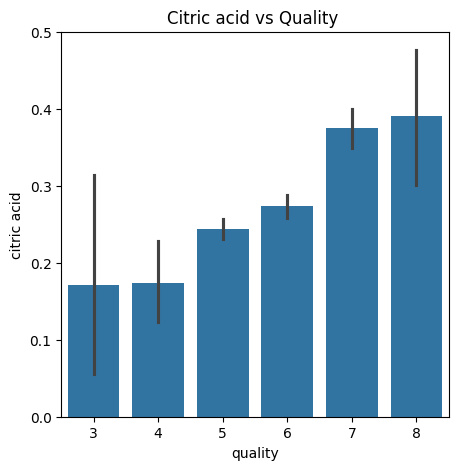

In [17]:
#opoposite to volatile acidity and citric acid is directly propotional to quality
plot = plt.figure(figsize =(5,5)) 


# if citric acid content is more we get high quality of wine
sns.barplot(x = 'quality',y = 'citric acid', data = data)  

plt.title('Citric acid vs Quality ')

## 5. Coorelation Matrix

In [18]:
# Correlation heat map between the columns
correlation = data.corr()


This color bar gives how much correlated the values are and -0.6 to -0.2 negative values are with in light color.Goodquality and quality which is 0.8 positively correlated and quality & volatile acid is-0.4 negatively correlated

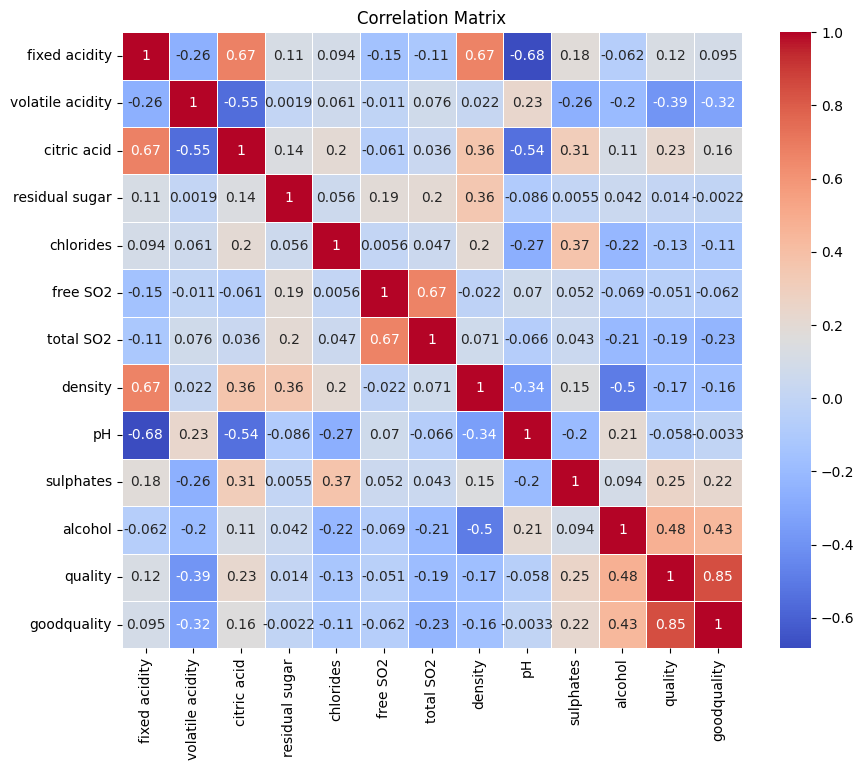

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The regression line is gradually increasing and in one direction,if the quality increases good quality parameter increases is a positive correlation

Text(0.5, 1.0, 'Quality Vs Goodquality positive correlation')

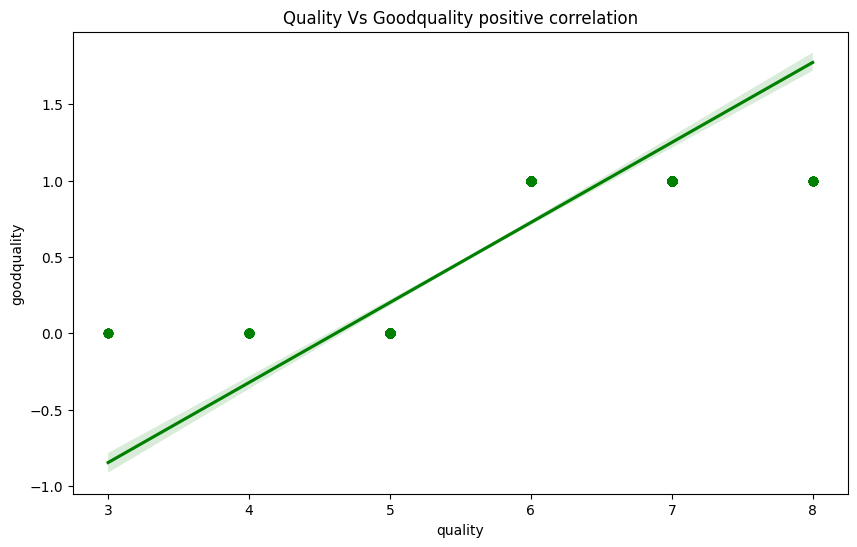

In [20]:
# visualization of positive correlation with quality 
plt.figure(figsize=(10,6))
sns.regplot(data = data,y= "goodquality",x = "quality", color = "g")
plt.title("Quality Vs Goodquality positive correlation")

Here the point gradually decreases and regression line is downwards so it is a negative correlation

Text(0.5, 1.0, 'Quality Vs Volatile acidity negative correlation')

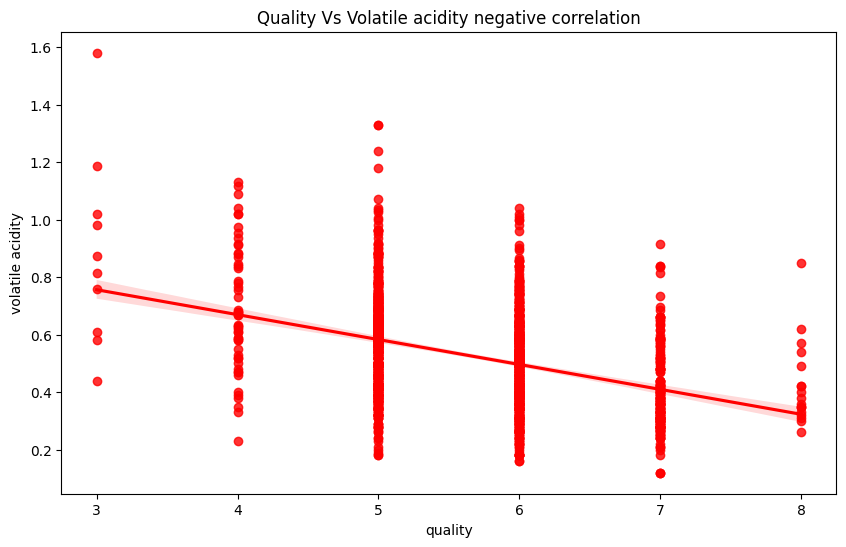

In [21]:
# visualization of negative correlation with quality 
plt.figure(figsize=(10,6))
sns.regplot(data = data,y= "volatile acidity",x = "quality", color = "r")
plt.title("Quality Vs Volatile acidity negative correlation")

## 6. Train and Evaluate Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [27]:
# Features and target variable
X = data.drop(columns=['quality'])
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization is especially important for algorithms like Logistic Regression and K-Nearest Neighbors.

In [28]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 **Apply Machine Learning Algorithms**

**a. Logistic Regression**

In [43]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:, {logistic_accuracy:.2f}")

Accuracy:, 0.81


**b. Decision Tree**

In [44]:
# Initialize the model
model = DecisionTreeClassifier()

# Train the model on the original training data (no need to scale)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:, {decision_tree_accuracy:.2f}")

Accuracy:, 0.80


**c. Random Forest**

In [45]:
# Initialize the model
model = RandomForestClassifier()

# Train the model on the original training data (no need to scale)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {random_forest_accuracy:.2f}")

Accuracy: 0.86


**d. K-Nearest Neighbors (KNN)**

In [47]:
# Initialize the K-Nearest Neighbors model
model = KNeighborsClassifier()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
KNN_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {KNN_accuracy:.2f}")

Accuracy: 0.82


## 7. Accuracy Comparison

In [48]:
# Accuracy of each model
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")
print(f"K-Nearest Neighbors Accuracy: {KNN_accuracy:.2f}")


Logistic Regression Accuracy: 0.81
Decision Tree Accuracy: 0.80
Random Forest Accuracy: 0.86
K-Nearest Neighbors Accuracy: 0.82


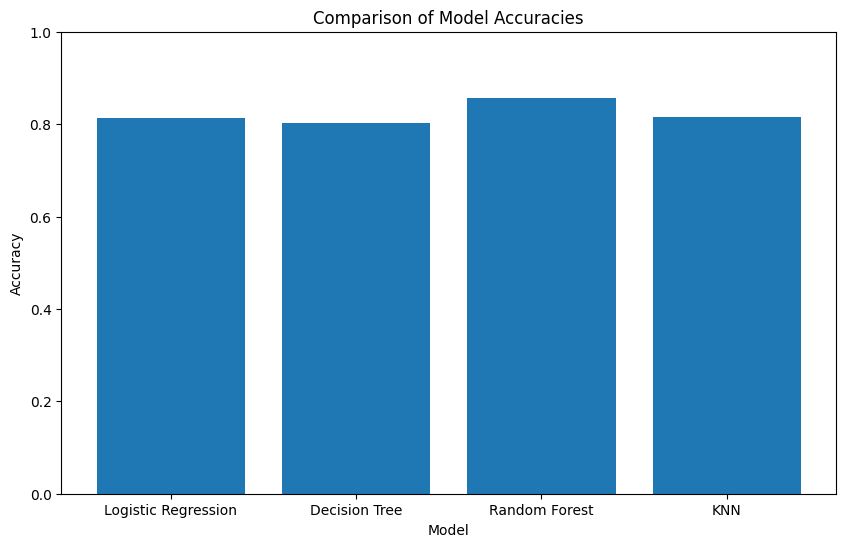

In [49]:
# visualization of accuracy comparision
model_accuracies = {
    'Logistic Regression': logistic_accuracy,
    'Decision Tree':decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'KNN': KNN_accuracy 
}

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1) 
plt.show()

**Performance of model** : After evaluating Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors, the Random Forest model achieved the highest accuracy, indicating it may be the most robust for this dataset.

**Conclusion** : Here, we can say that random Forest provided the highest accuracy, indicating it is the most effective model for this dataset. K-Nearest Neighbors, which required scaling, showed variable results. Overall, Random Forest appears to be the most reliable choice for prediction.